

## 첫번째



In [2]:
!pip install category_encoders
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.5 MB/s 
     |████████████████████████████████| 133 kB 40.9 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=2205cffdfb34a205961edf8632710db02f04b954bd42908decaffe5911b23fbf
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requir

In [3]:
!pip3 install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train_dataset.csv to train_dataset.csv


모든 실험에는 목적이 있다.

이번에 나는 보다 관찰을 통해 나타낸 통계적인 결과를 이용할 것이며 학습을 통해 조금 더 판단을 좁혀 나가보도록 하겠다

In [6]:
#원하는 방향에 대한 
df= pd.read_csv('train_dataset.csv')

In [7]:
pd.set_option('display.max_columns', None)
df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,93,144,53,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,91,227,100,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,115,225,196,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,102,206,48,79,116,12.0,1,0.6,24,20,17,0,1


In [8]:
def analysis_on_features(df):

    eda_results = pd.DataFrame()

    eda_results['null_count'] = df.isnull().sum()
    eda_results["num_unique_values"] = df.nunique()
    duplicated_rows = df.duplicated().sum()
    

    return eda_results, duplicated_rows

In [9]:
df_clean = df.drop_duplicates()

In [10]:
df.shape

(38984, 23)

In [11]:
print(df_clean.shape)

(33467, 23)


In [12]:
train_results, train_duplicated_rows = analysis_on_features(df_clean)
train_results, train_duplicated_rows

(                     null_count  num_unique_values
 age                           0                 14
 height(cm)                    0                 13
 weight(kg)                    0                 22
 waist(cm)                     0                545
 eyesight(left)                0                 19
 eyesight(right)               0                 17
 hearing(left)                 0                  2
 hearing(right)                0                  2
 systolic                      0                125
 relaxation                    0                 94
 fasting blood sugar           0                258
 Cholesterol                   0                279
 triglyceride                  0                389
 HDL                           0                122
 LDL                           0                286
 hemoglobin                    0                143
 Urine protein                 0                  6
 serum creatinine              0                 34
 AST        

In [ ]:
#df는 바로 분리 df_2는 Unnamed와 id를 제거

In [13]:
#첫번째는 각 사람의 체형 혹은 습관 및 기본적인 신체 검사를 통해 측정
#뚱뚱한 사람이 담배를 피게 된다는 말 보다 담배를 피면 체형에 영향을 줄 수 있다는 점이 더 설득력있음
#담배의 영향과 별개로 이뤄지는 feature들 삭제  
#담배를 성인때 핀다는 가정으로 height는 영향이 없기 때문에 삭제, age는 흡연에 영향과는 별개, 분포로는 가능 (삭제)
df_clean=df_clean.drop(columns=['height(cm)', 'age'])
target = 'smoking'
train, test = train_test_split(df_clean, test_size=0.2)
X_train, y_train = train.drop(columns=target), train[target]
X_test, y_test = test.drop(columns=target), test[target]

In [ ]:
#target_2는 종양이 악성인지 양성인지 확인하기 위해 조직검사 전에 선별할 수 있도록 하는 용도
#image_classification이 따라준다면 신뢰도 상승 예상
#먼저 diagnosis labelencoding
'''df_clean2=df_clean2.drop(columns=['Unnamed: 32'])
target_2='diagnosis'
le = LabelEncoder()
df_clean2[target_2]= le.fit_transform(df_clean2['diagnosis'])'''

In [14]:
def analysis_on_target(df,a):


    n_zero_label= len(df[df[a]==0])
    n_one_label= len(df[df[a]==1])



    plt.pie(
        (n_zero_label, n_one_label),
        labels=(0, 1),        
        autopct="%.2f%%",
        shadow=True,
        startangle=90,
    )
    plt.title("Target:"+a, size=15)
    plt.show()

    return n_zero_label, n_one_label

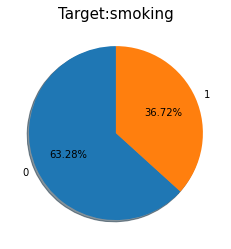

In [15]:
train_label_count = analysis_on_target(train, 'smoking')

#많이 unbalance한 것은 아니지만 weight해서 최대한 balance맞추도록 함

# 두번째(규칙 구하기)

In [16]:
X_train.columns

Index(['weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
       'hearing(left)', 'hearing(right)', 'systolic', 'relaxation',
       'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL',
       'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp',
       'dental caries'],
      dtype='object')

In [17]:
np.array(train[train['smoking']==1]['weight(kg)'])

array([65, 60, 60, ..., 60, 80, 60])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


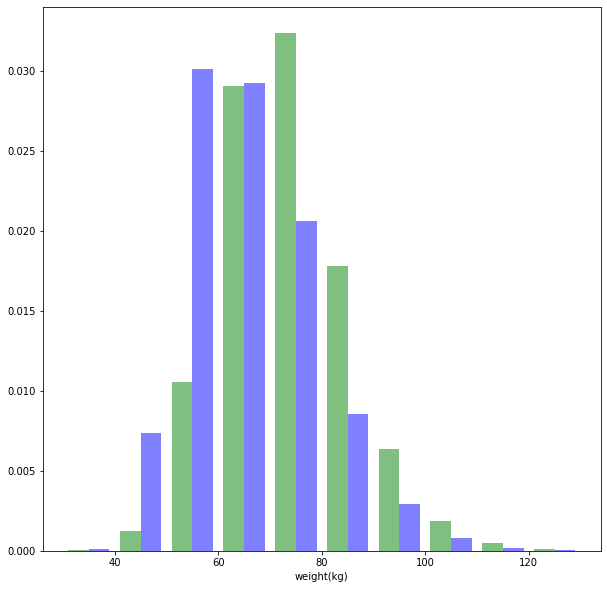

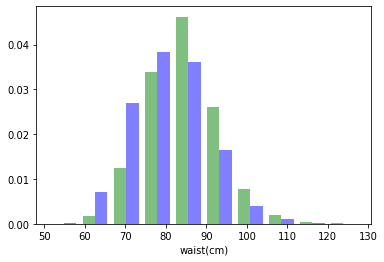

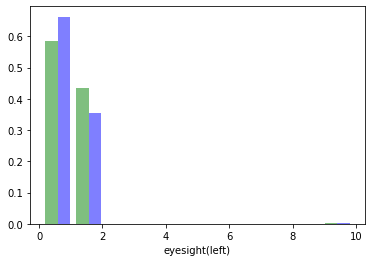

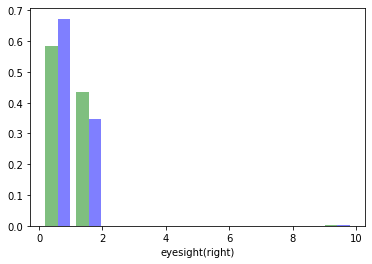

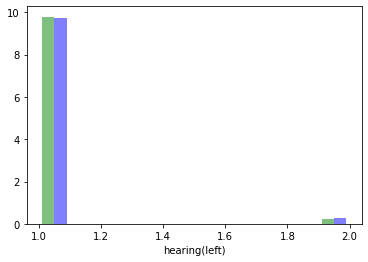

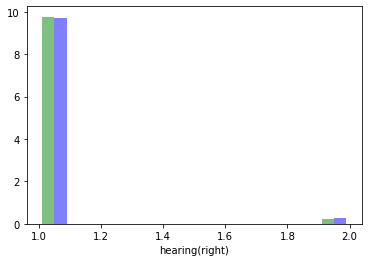

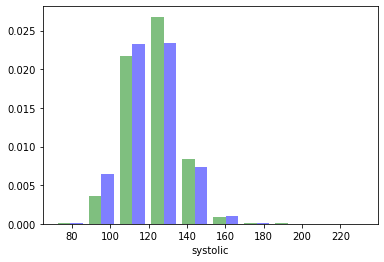

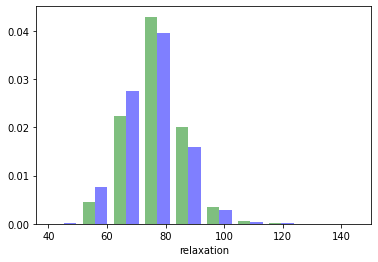

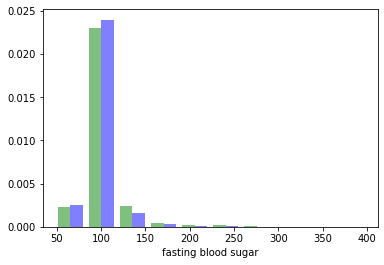

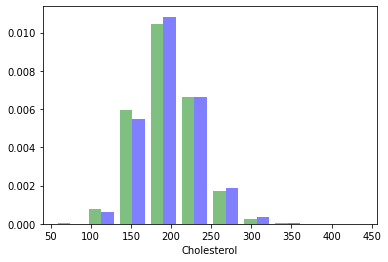

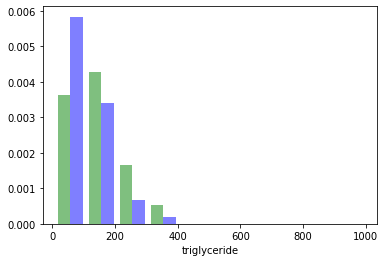

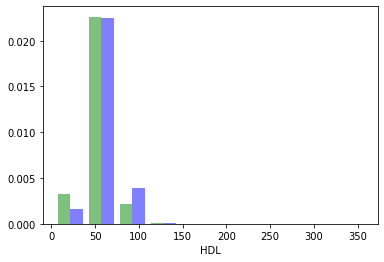

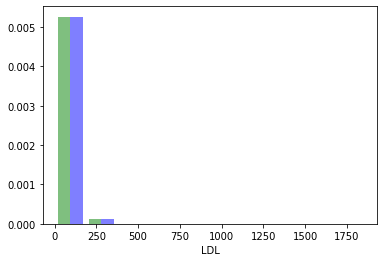

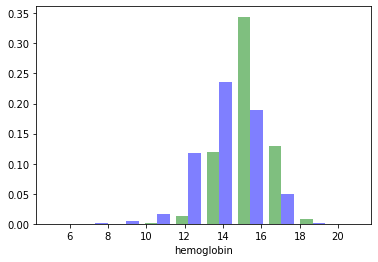

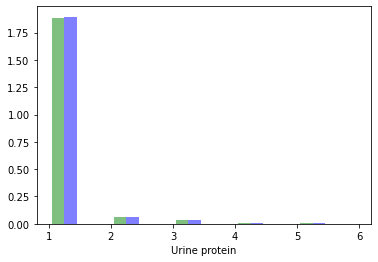

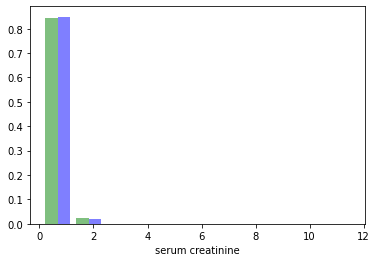

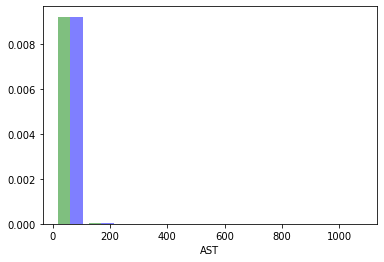

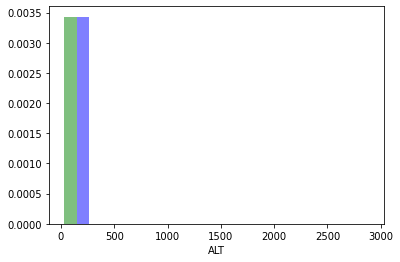

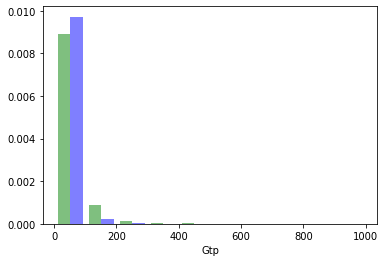

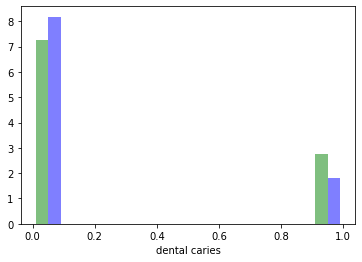

In [18]:
EDA_features = X_train.columns
fig = plt.figure(figsize=(10, 10))

for i,feature in enumerate(EDA_features) : 
  x= np.array(train[train['smoking']==1][feature])
  y=np.array(train[train['smoking']==0][feature])
  plt.hist([x,y],
           histtype='bar',color=['g','b'], alpha=0.5,density=True)
  plt.xlabel(feature)  
  plt.show()




In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
import warnings
from xgboost import XGBClassifier

In [ ]:
#binary형태의 target은 logistic 회귀 분석으로 이해하고 모델을 학습
#f1_score를 통해서 

In [20]:
base_major = y_train.mode()[0]
y_pred_base = [base_major] * len(y_train)

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print("training accuracy: ", accuracy_score(y_train, y_pred_base).round(2))

y_pred_base_test = [base_major] * len(y_test)
print("test accuracy: ", accuracy_score(y_test, y_pred_base_test).round(2))
print("test f1: ", f1_score(y_test, y_pred_base_test).round(2))

training accuracy:  0.63
test accuracy:  0.64
test accuracy:  0.0


In [25]:
logistic = LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)
y_test_pred = logistic.predict(X_test)
print('logistic train accuracy', logistic.score(X_train, y_train).round(2))
print("logistic test accuracy: ", accuracy_score(y_test, y_test_pred).round(2))
print("logistic test f1: ", f1_score(y_test, y_test_pred).round(2))

logistic train accuracy 0.71
logistic test accuracy:  0.7
logistic test f1:  0.64


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [109]:
print('회귀계수가 양수인 특성 상위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).head(3), '\n')
print('회귀계수가 음수인 특성 하위 3개')
print(pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False).tail(5))

회귀계수가 양수인 특성 상위 3개
hemoglobin       0.396220
dental caries    0.053897
weight(kg)       0.051928
dtype: float64 

회귀계수가 음수인 특성 하위 3개
Urine protein   -0.007916
Cholesterol     -0.008360
HDL             -0.015894
systolic        -0.017722
waist(cm)       -0.064917
dtype: float64


In [110]:
pd.Series(logistic.coef_[0], logistic.feature_names_in_).sort_values(ascending=False)

hemoglobin             0.396220
dental caries          0.053897
weight(kg)             0.051928
serum creatinine       0.029675
Gtp                    0.015020
eyesight(right)        0.013334
eyesight(left)         0.011749
triglyceride           0.004333
LDL                    0.000545
fasting blood sugar   -0.000786
relaxation            -0.002617
AST                   -0.003492
hearing(right)        -0.003845
ALT                   -0.006557
hearing(left)         -0.006563
Urine protein         -0.007916
Cholesterol           -0.008360
HDL                   -0.015894
systolic              -0.017722
waist(cm)             -0.064917
dtype: float64

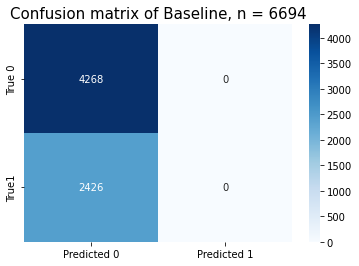

In [28]:
y_true0 = y_test.value_counts()[0]
y_true1 = y_test.value_counts()[1]
fn = len(y_pred_base_test) - y_true0
base = pd.DataFrame(index = ['True 0', 'True1'], data = {'Predicted 0':[y_true0, fn], 'Predicted 1':[0,0]})

fig, ax = plt.subplots()
sns.heatmap(base, cmap=plt.cm.Blues, annot=True,fmt="d")
plt.title(f'Confusion matrix of Baseline, n = {len(y_test)}', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


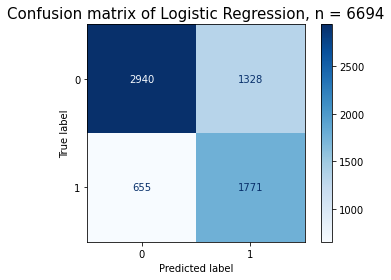

In [29]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(logistic, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_test)}', fontsize=15)
plt.show()

In [73]:
from sklearn.tree import DecisionTreeClassifier
Dic = DecisionTreeClassifier(random_state=42, criterion="entropy")
sc=StandardScaler()
sc.fit(X_train)
X_train_std= sc.transform(X_train)
X_test_std = sc.transform(X_test)
Dic.fit(X_train, y_train)

print("훈련 정확도: ", Dic.score(X_train, y_train))
print("검증 정확도: ", Dic.score(X_test, y_test))

y_pred = Dic.predict(X_test)
f1_score(y_test,y_pred)

훈련 정확도:  1.0
검증 정확도:  0.6517777113833284


0.5329593267882188

In [112]:
import graphviz
from sklearn.tree import export_graphviz

# graphviz 설치방법: conda install -c conda-forge python-graphviz

# named_steps 속성을 사용해서 파이프라인의 각 스텝에 접근이 가능합니다.
# named_steps 은 유사 딕셔너리 객체(dictionary-like object)로 파이프라인 내 과정에 접근 가능하도록 합니다.
model_dt = rf

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names= X_train.columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


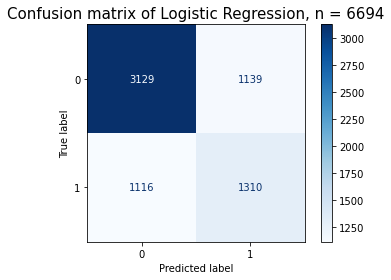

In [31]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(Dic, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix of Logistic Regression, n = {len(y_test)}', fontsize=15)
plt.show()

In [32]:
from sklearn.metrics import classification_report

y_pred = Dic.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      4268
           1       0.53      0.54      0.54      2426

    accuracy                           0.66      6694
   macro avg       0.64      0.64      0.64      6694
weighted avg       0.66      0.66      0.66      6694



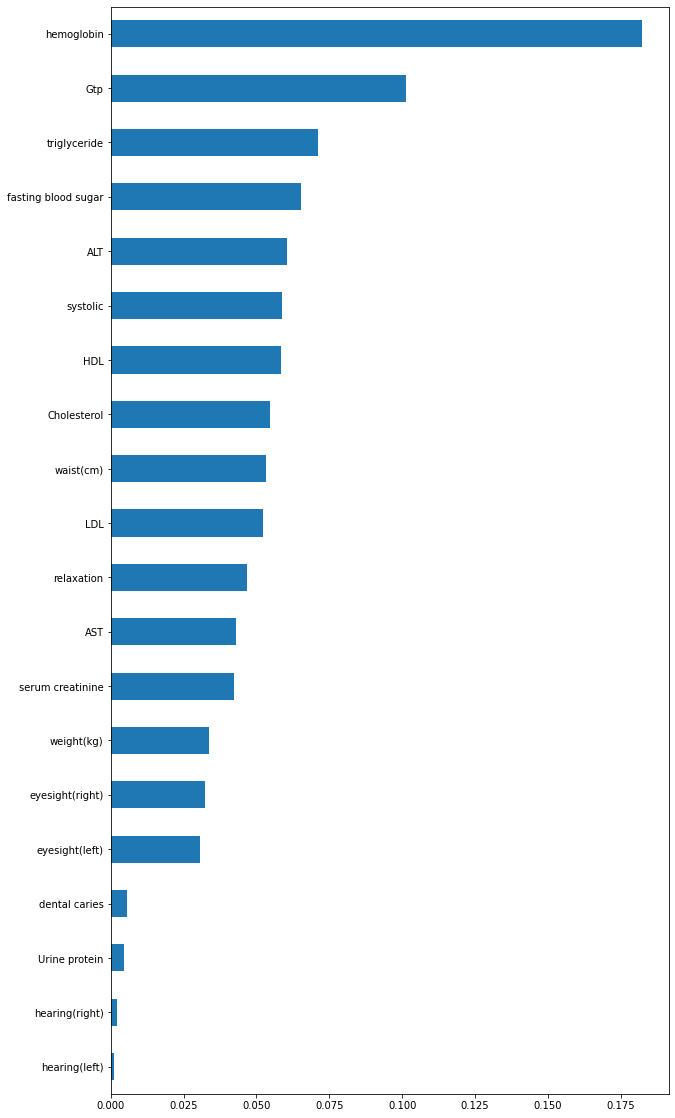

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

importances = pd.Series(Dic.feature_importances_, X_train.columns)
plt.figure(figsize=(10, 20))
importances.sort_values().plot.barh();

In [ ]:
#AST까지만 건져내도록 하자

In [69]:
X_train = X_train.drop(columns=['serum creatinine','waist(cm)',  'dental caries', 'hearing(right)', 'hearing(left)',
                       'Urine protein'])

KeyError: ignored

In [35]:
X_test = X_test.drop(columns=['serum creatinine','waist(cm)',  'dental caries','hearing(right)', 'hearing(left)',
                       'Urine protein'])

In [49]:
from sklearn.ensemble import RandomForestClassifier


rf= RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)


rf.fit(X_train, y_train)
rf_x_test= rf.predict(X_test)
print("훈련 정확도: ", rf.score(X_train, y_train))
print("테스트 정확도: ", rf.score(X_test, y_test))
print("f1_score:", f1_score(y_test, rf_x_test))

훈련 정확도:  1.0
테스트 정확도:  0.7272184045413803
f1_score: 0.6040763226366003


In [114]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

In [115]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf, param_grid=params, scoring="f1", cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=10;, score=0.660 total time=   0.5s
[CV 2/3] END max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=10;, score=0.664 total time=   0.4s
[CV 3/3] END max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=10;, score=0.658 total time=   0.4s
[CV 1/3] END max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=100;, score=0.669 total time=   2.3s
[CV 2/3] END max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=100;, score=0.664 total time=   1.6s
[CV 3/3] END max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=100;, score=0.661 total time=   1.6s
[CV 1/3] END max_depth=6, min_samples_leaf=8, min_samples_split=16, n_estimators=10;, score=0.660 total time=   0.2s
[CV 2/3] END max_depth=6, min_samples_leaf=8, min_samples_split=16, n_estimators=10;, score=0.664 total time=   0.2s
[CV 3

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [10, 100]},
             scoring='f1', verbose=3)

In [117]:
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 f1: ", grid_search.best_score_)

최적 하이퍼파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최적 f1:  0.6706921227316108


In [43]:
xgbc= XGBClassifier( 
    objective="binary:logistic",
    eval_metric="error",
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    learning_rate=0.1,
    use_label_encoder=False,
)

In [118]:
params = {
    "xgbclassifier__max_depth": [2, 4, 6,8,10],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],
}

In [120]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(xgbc, param_grid=params, scoring="f1", cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.628 total time=   8.4s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.630 total time=   2.0s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=2;, score=0.628 total time=   2.0s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.628 total time=   2.0s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.630 total time=   2.0s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=4;, score=0.628 total time=   2.0s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max

GridSearchCV(cv=3,
             estimator=XGBClassifier(eval_metric='error', n_estimators=200,
                                     n_jobs=-1, random_state=42,
                                     use_label_encoder=False),
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
                         'xgbclassifier__min_child_weight': [2, 4, 8]},
             scoring='f1', verbose=3)

In [119]:
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 f1: ", grid_search.best_score_)

최적 하이퍼파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최적 f1:  0.6706921227316108


In [52]:
pipe = make_pipeline(
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=2,
        min_child_weight=2,
        colsample_bytree=0.6,
        learning_rate=0.1,
        use_label_encoder=False,
    ),
)

pipe.fit(X_train, y_train)
print("검증 AUC: ", pipe.score(X_test, y_test))
pip_test = pipe.predict(X_test)
f1_score(y_test,pip_test)


검증 AUC:  0.7314012548550941


0.6187446988973706

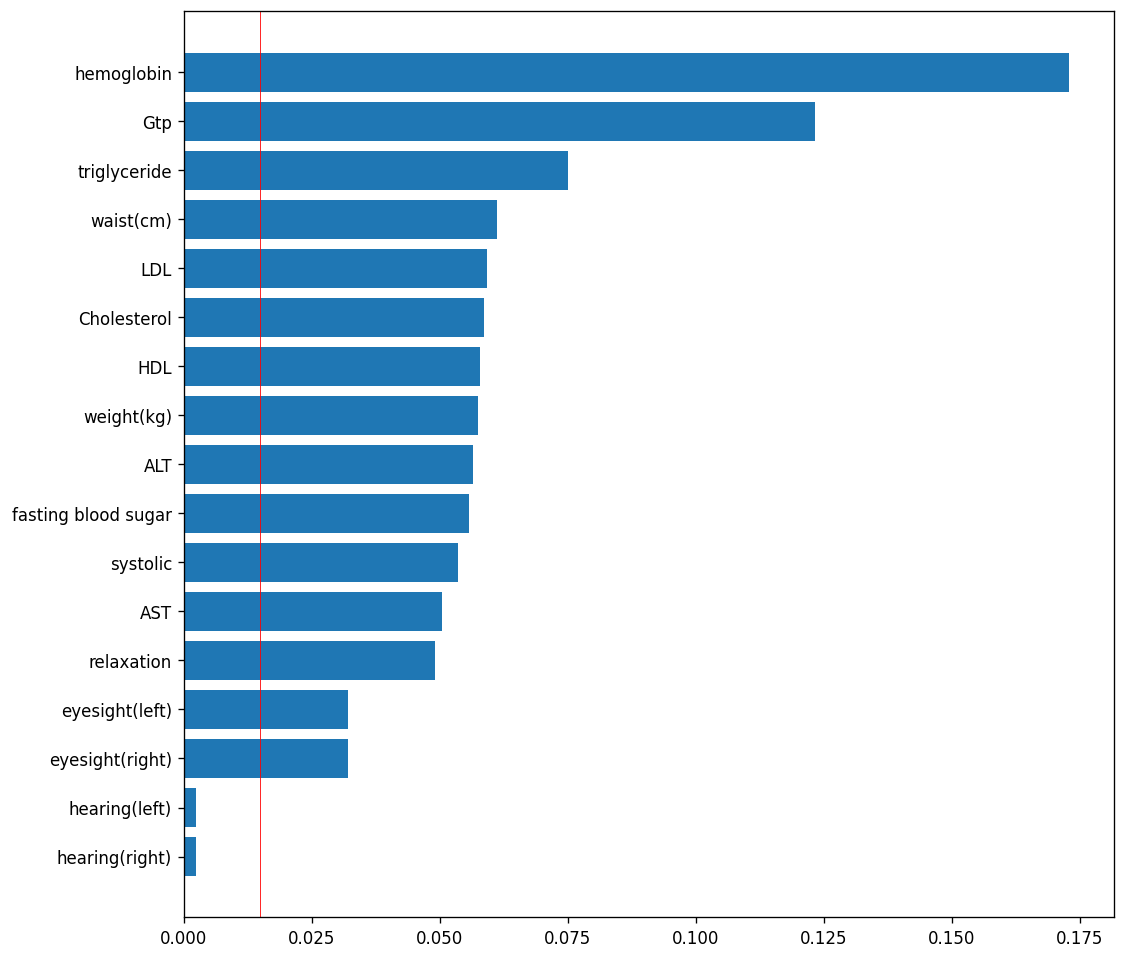

In [116]:
feature_importances = list(
    zip(X_train.columns, rf.feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

In [125]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 140 kB/s 
     |████████████████████████████████| 13.1 MB 37.9 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=0f84f676952bce19a3d5ea537331aef63ea7040fdfafb32219b557da1a7292d8
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=bd7edfb3230a17e9e5810171ad52472c7b1041b9124ad98f22ed4796f3c38d5a
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79b8699b10>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79b8699a50>})

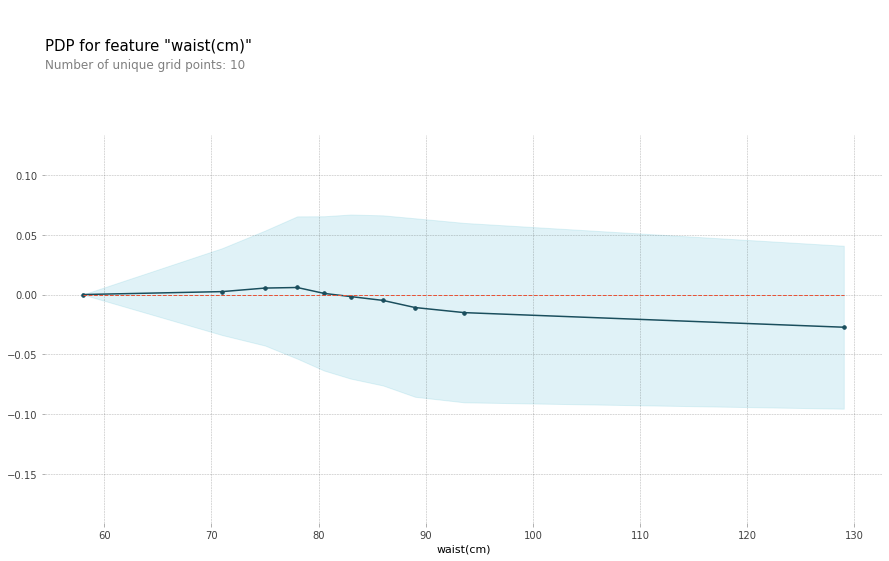

In [145]:
from pdpbox.pdp import pdp_isolate, pdp_plot

target_feature = "waist(cm)"

isolated = pdp_isolate(
    model=rf,
    dataset=X_test,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79be80c750>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79be8932d0>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79be761b50>}})

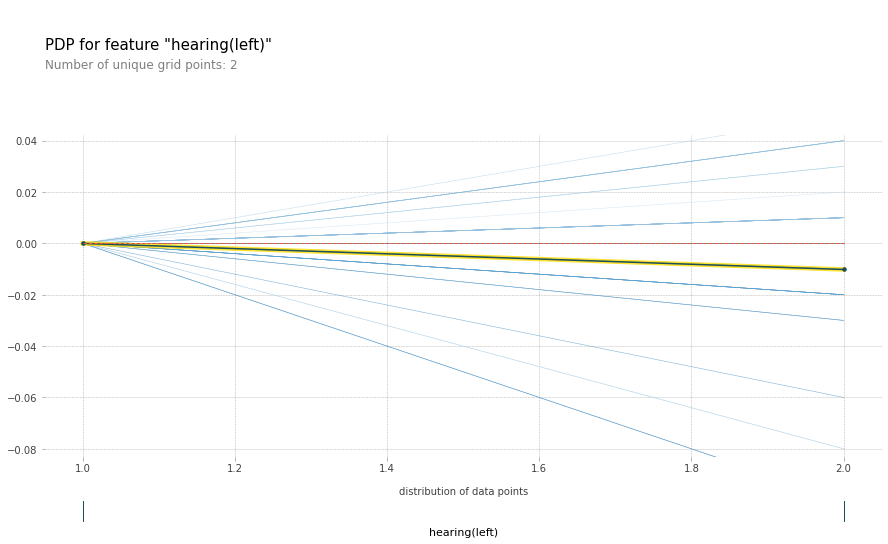

In [129]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79be76f250>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79bba00890>})

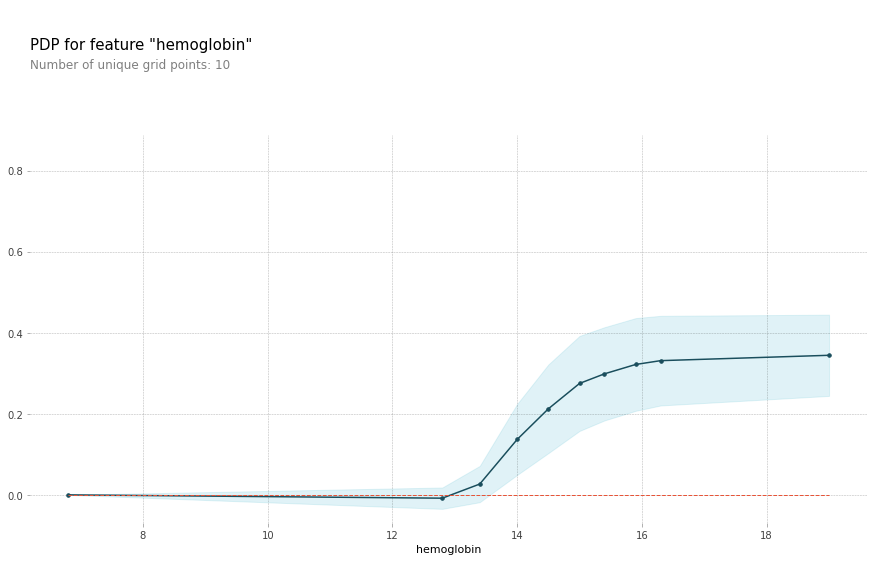

In [136]:

target_feature = "hemoglobin"

isolated = pdp_isolate(
    model=rf,
    dataset=X_test,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
pdp_plot(isolated, feature_name=target_feature)

(<Figure size 1080x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79be93ab90>,
  'pdp_ax': {'_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79be5e6350>,
   '_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79be450690>}})

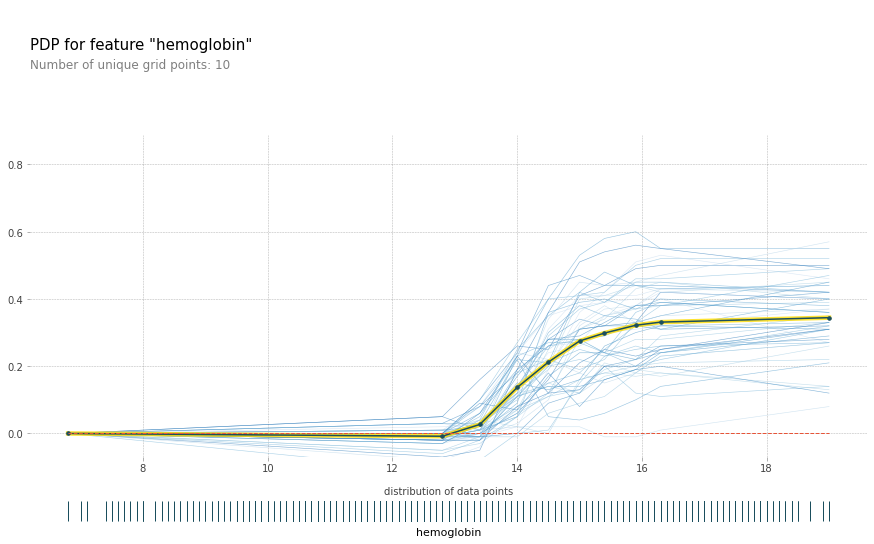

In [137]:
pdp_plot(
    isolated,
    feature_name=target_feature,
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)

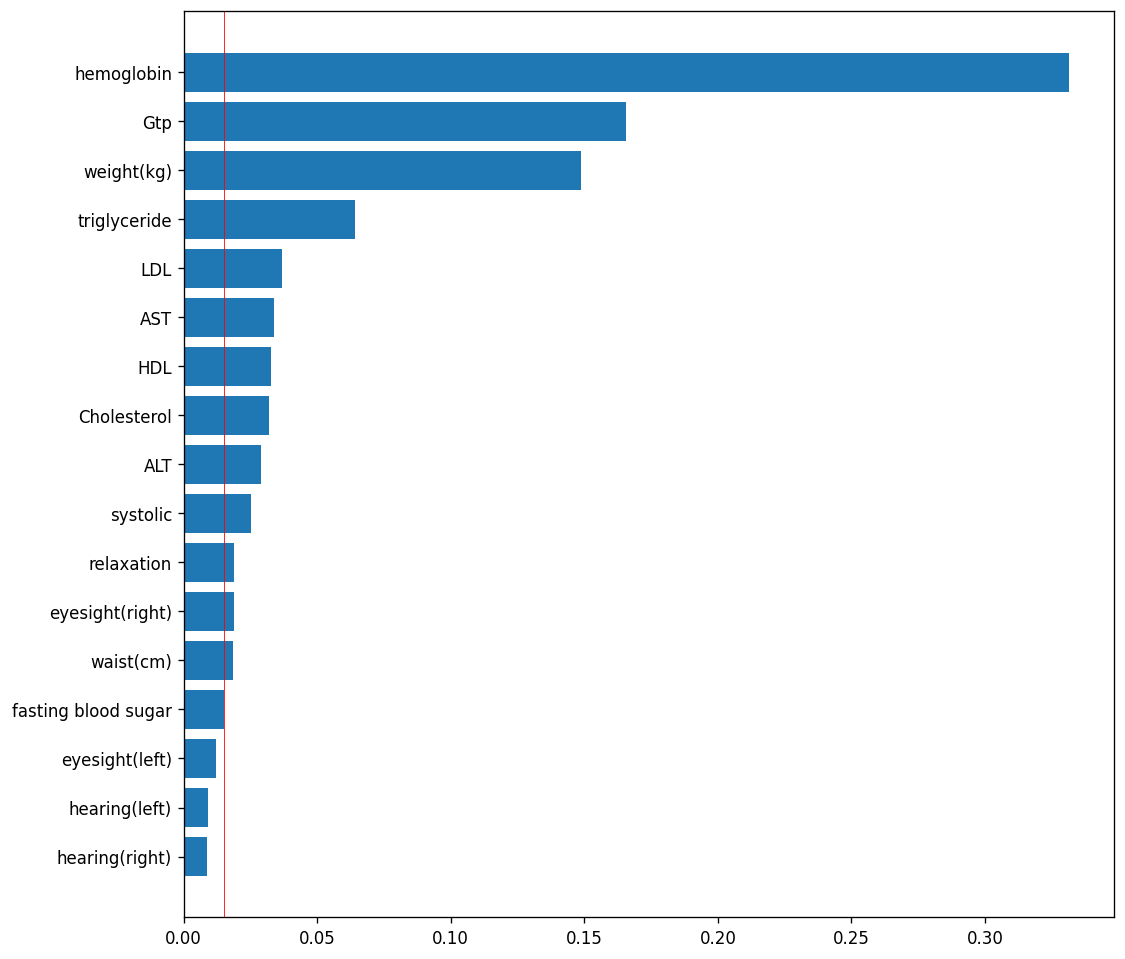

In [55]:
feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

In [70]:
from eli5.sklearn import PermutationImportance

def get_pipeline():
    return make_pipeline(
        RandomForestClassifier(
            n_estimators=100, random_state=42, class_weight="balanced"
        ),
    )
pipe = get_pipeline()
pipe.fit(X_train, y_train)

#permuter 정의
permuter = PermutationImportance(
    pipe.named_steps["randomforestclassifier"],
    scoring="f1", 
    n_iter=5, 
    random_state=42,
)

In [121]:
# 스코어를 다시 계산합니다.
rf.fit(X_train, y_train)

permuter.fit(X_test, y_test)

PermutationImportance(estimator=RandomForestClassifier(class_weight='balanced',
                                                       random_state=42),
                      random_state=42, scoring='f1')

In [123]:
# 특성별 score을 확인합니다.
feature_names = X_test.columns.tolist()
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.1539 ± 0.0060,Gtp
0.1348 ± 0.0114,hemoglobin
0.0482 ± 0.0039,triglyceride
0.0451 ± 0.0070,weight(kg)
0.0211 ± 0.0038,HDL
0.0191 ± 0.0020,Cholesterol
0.0179 ± 0.0070,waist(cm)
0.0154 ± 0.0057,AST
0.0146 ± 0.0060,LDL
0.0075 ± 0.0072,ALT


In [138]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79b79e7050>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79b7956dd0>})

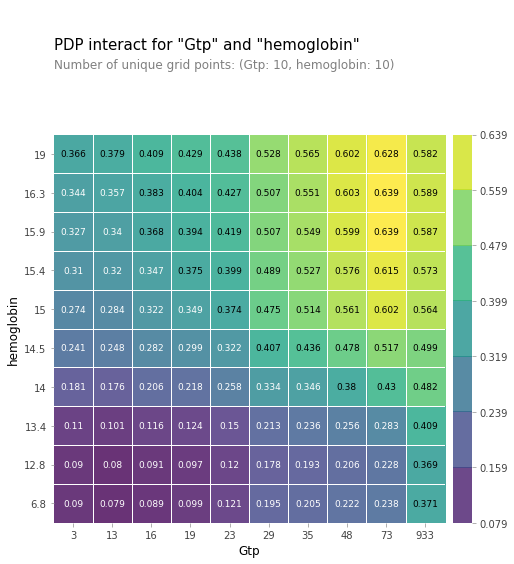

In [148]:
target_features = ['Gtp', 'hemoglobin']

interaction = pdp_interact(
    model=rf,
    dataset=X_test,
    model_features=X_test.columns,
    features=target_features,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79b7acafd0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f79b7a9c310>})

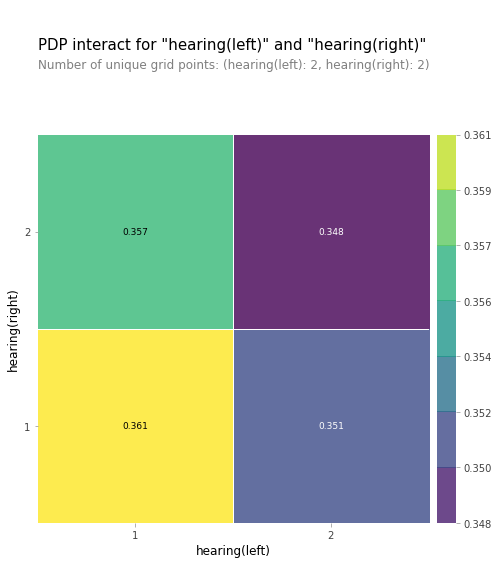

In [147]:
target_features = ["hearing(left)", "hearing(right)"]

interaction = pdp_interact(
    model=rf,
    dataset=X_test,
    model_features=X_test.columns,
    features=target_features,
)
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      4268
           1       0.64      0.54      0.59      2426

    accuracy                           0.73      6694
   macro avg       0.70      0.69      0.69      6694
weighted avg       0.72      0.73      0.72      6694



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


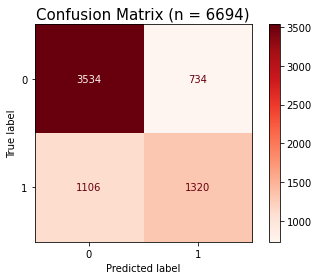

AUC: 0.7956953663490876


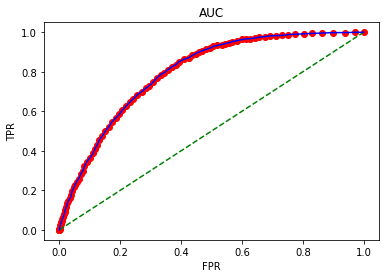

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


print(classification_report(y_test, pipe.predict(X_test)))

plot_confusion_matrix(pipe, X_test, y_test, cmap=plt.cm.Reds)
plt.title(f"Confusion Matrix (n = {len(y_test)})", fontsize=15)
plt.show()

y_pred_proba = pipe.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(baseline_fpr, baseline_tpr, linestyle="--", color="green", label="Baseline")
plt.plot(fpr, tpr, color="blue", label="Model")
plt.scatter(fpr, tpr, color="red")
plt.title("AUC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder


def get_pipeline():
    return make_pipeline(
        RandomForestClassifier(
            n_estimators=100, random_state=42, class_weight="balanced"
        ),
    )


pipe = get_pipeline()
pipe.fit(X_train, y_train)
print("검증 정확도", pipe.score(X_test, y_test))

검증 정확도 0.7251269793845234


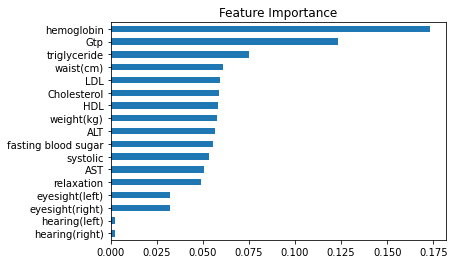

Text(0.5, 1.0, 'Cardinailty')

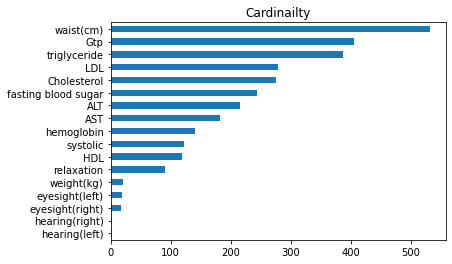

In [67]:
# 특성 중요도
rf = pipe.named_steps["randomforestclassifier"]
importances = pd.Series(rf.feature_importances_, X_train.columns)

importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

X_train.nunique().sort_values().plot.barh()
plt.title("Cardinailty")

In [ ]:
#random forest가 확률이 높게 나옴